In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [48]:
# Reading CSV file and transposing
dataset = pd.read_csv('grendene-indicadores-financeiros.csv').transpose()

# Setting columns names as the data's first column and removing that column
dataset.columns = dataset.iloc[0]
dataset = dataset.iloc[5:,]

# Transforming index to datetime
dataset['Trimestre'] = pd.to_datetime(dataset.index.values)
dataset = dataset.set_index('Trimestre')
dataset.head(10)

Data,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,...,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,
2004-12-31,0.148932,0.821877,2.52863,0.417843,1.56042e+08,1.48643e+08,14.1,20.1,21.1,16.7,...,18,5.83647e+08,8.3,0.7,3,2.6874e+07,2.6894e+07,99.9,15.6,NaN
2005-03-31,0.106102,0.863609,1.89915,NaN,2.87898e+08,1.52073e+08,14.2,19.6,37,16.4,...,18.2,4.8935e+08,15.3,0.7,3,NaN,NaN,NaN,NaN,NaN
2005-06-30,0.0650608,0.873736,1.53993,NaN,2.65759e+08,1.54284e+08,15.1,19.6,33.8,16.4,...,16.1,5.21358e+08,42.9,0.7,3.4,NaN,NaN,NaN,NaN,NaN
2005-09-30,0.0719622,0.952314,1.26812,NaN,2.85149e+08,1.65287e+08,14.6,19.3,33.3,16.2,...,13.2,5.71934e+08,33.2,1,3.5,NaN,NaN,NaN,NaN,NaN
2005-12-31,0.0937722,0.947297,1.17377,0.170268,3.07976e+08,1.7613e+08,15.2,20.7,36.1,17.1,...,14.3,5.44591e+08,17,1.4,3.3,4.2941e+07,2.6842e+07,160,15.8,2.54085e+08
2006-03-31,0.0990111,0.9931,1.1511,0.167978,4.29948e+08,1.79115e+08,15,20,48.1,16.7,...,16.7,4.63842e+08,24.4,1.6,3.2,3.4624e+07,2.7303e+07,126.8,15.8,2.44201e+08
2006-06-30,0.131567,1.03906,1.1397,0.199952,4.42764e+08,1.80243e+08,15.1,19.3,47.3,16.2,...,19.3,4.9239e+08,8.2,1.7,2.9,2.1636e+07,2.7692e+07,78.1,15.3,2.58184e+08
2006-09-30,0.140957,1.08191,1.1369,0.211174,3.95001e+08,2.7402e+08,20,28.1,40.6,22,...,18.7,5.78714e+08,0.5,1.8,2.8,1.2379e+07,2.7615e+07,44.8,15,2.30033e+08
2006-12-31,0.149379,1.08876,1.20985,0.229708,3.52009e+08,2.78752e+08,19.7,28.4,35.9,22.1,...,21.8,6.27875e+08,5.4,1.8,2.9,1.2195e+07,2.7108e+07,45,15,1.67214e+08


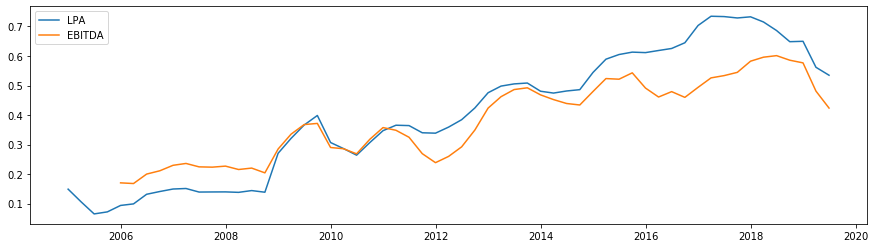

In [49]:
plt.rcParams["figure.figsize"] = (15,4)
plt.plot(dataset['LPA Lucro por Acao $'], label = 'LPA')
plt.plot(dataset['EBITDA por Acao $'], label = 'EBITDA')
plt.legend()

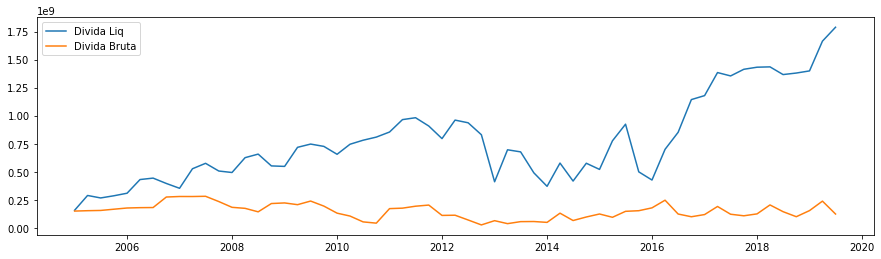

In [50]:
plt.plot(dataset['Divida Total Liquida $'], label = 'Divida Liq')
plt.plot(dataset['Divida Total Bruta $'], label = 'Divida Bruta')
plt.legend()

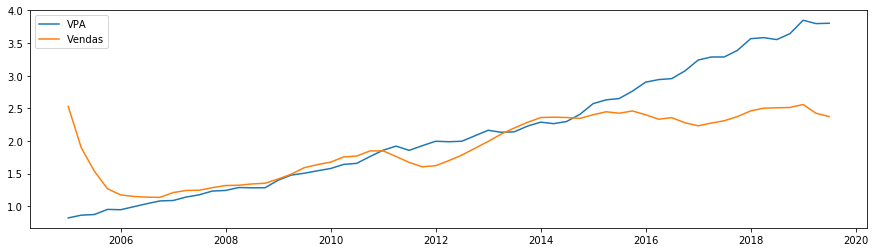

In [51]:
plt.plot(dataset['VPA Valor Patr por Acao$'], label = 'VPA')
plt.plot(dataset['Vendas por Acao $'], label = 'Vendas')
plt.legend()